Business Problem
Which geographical areas in Victoria have highest electricity demand and demand growth to define the marketing strategy? 


In [218]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt

In [219]:
const_citipower = 'CitiPower'
const_jemena = 'Jemena'
const_powercor = 'Powercor'
const_ausnet = 'AusNet'
const_united = 'United'

In [220]:
# Load all demand data from 2014 to 2019
# demand_df = dd.read_csv('Meter data\VIC_20*.csv')
# demand_df.head()

dir = 'Meter data/VIC_20*.csv'
files = glob.glob(dir)
demand_df = pd.DataFrame()
for f in files:
    df = pd.read_csv(f)
    demand_df = demand_df.append(df,ignore_index=True) 

In [221]:

demand_df['SETTD'] =  pd.to_datetime(demand_df['SETTD'], format="%d/%m/%Y")

In [222]:
req_colms = ['DAILYT', 'VAL01', 'VAL02', 'VAL03', 'VAL04', 'VAL05', 'VAL06', 'VAL07', 'VAL08', 'VAL09', 'VAL10', 'VAL11', 
             'VAL12', 'VAL13', 'VAL14', 'VAL15', 'VAL16', 'VAL17', 'VAL18', 'VAL19', 'VAL20', 'VAL21', 'VAL22', 'VAL23', 
             'VAL24', 'VAL25', 'VAL26', 'VAL27', 'VAL28','VAL29', 'VAL30', 'VAL31', 'VAL32', 'VAL33', 'VAL34', 'VAL35', 
             'VAL36','VAL37', 'VAL38', 'VAL39', 'VAL40', 'VAL41', 'VAL42', 'VAL43', 'VAL44','VAL45', 'VAL46', 'VAL47', 'VAL48']

demand_df[req_colms] = demand_df[req_colms].astype('float64')


In [223]:
demand_df['Business_Demand'] = 0
demand_df['Non_Business_Demand'] = 0

for i, dailyDemand in demand_df.iterrows():
    d = dailyDemand['SETTD'].weekday()
    if((d == 5) or (d == 6)):
        demand_df.at[i,'Non_Business_Demand'] = dailyDemand['DAILYT']
        demand_df.at[i,'Business_Demand'] = 0
    else:
        demand_df.at[i,'Business_Demand'] = dailyDemand['VAL15'] + dailyDemand['VAL16'] + dailyDemand['VAL17'] + dailyDemand['VAL18'] + \
        dailyDemand['VAL19'] + dailyDemand['VAL20'] + dailyDemand['VAL21'] + dailyDemand['VAL22'] + dailyDemand['VAL23'] + dailyDemand['VAL24'] + \
        dailyDemand['VAL25'] + dailyDemand['VAL26'] + dailyDemand['VAL27'] + dailyDemand['VAL28'] + dailyDemand['VAL29'] + dailyDemand['VAL30'] + \
        dailyDemand['VAL31'] + dailyDemand['VAL32'] + dailyDemand['VAL33'] + dailyDemand['VAL34']
        
        demand_df.at[i,'Non_Business_Demand'] = dailyDemand['DAILYT'] - demand_df.at[i,'Business_Demand']

demand_df = demand_df[['SETTD','PROFILEAREA','DAILYT','Business_Demand', 'Non_Business_Demand']]
demand_df = demand_df.rename(columns={"SETTD": "Measure_Date", "PROFILEAREA": "Distributor", "DAILYT": "Daily_Demand"})

In [224]:
def mapDistributorName(dist):
    db = ''
    if dist == 'CITIPOWER':
        db = const_citipower
    elif dist == 'VICAGL':        
        db = const_jemena
    elif dist == 'POWERCOR':        
        db = const_powercor
    elif dist == 'TXU':        
        db = const_ausnet
    elif dist == 'UNITED':        
        db = const_united       
    return db

In [225]:
demand_df["Distributor"] = demand_df['Distributor'].apply(mapDistributorName)
demand_df.to_csv('Meter data/Demand.csv', encoding='utf-8', index = False)

In [226]:
annualDemand2019DF = demand_df.loc[((demand_df.Measure_Date >= '2018-07-01') & (demand_df.Measure_Date < '2019-07-01'))]
demandDBGroup2019DF = annualDemand2019DF.groupby(['Distributor']).agg({'Daily_Demand':'sum'}) 
demandDBGroup2019DF = pd.DataFrame(demandDBGroup2019DF['Daily_Demand']/1000000)
demandDBGroup2019DF = demandDBGroup2019DF.rename(columns={"Daily_Demand" : "Total_Demand 2019 (GWh)"})
demandDBGroup2019DF

,Total_Demand 2019 (GWh)
Distributor,
AusNet,3835.008990
CitiPower,2047.161158
Jemena,1658.313100
Powercor,4512.949229
United,3370.957059


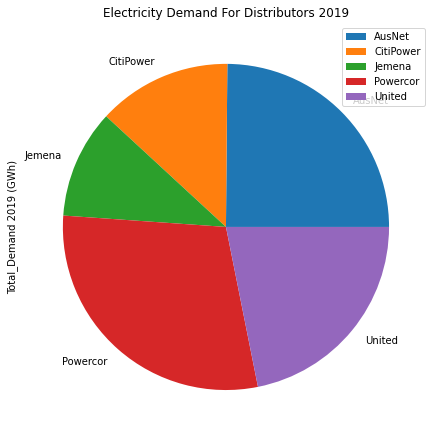

In [227]:

plot = demandDBGroup2019DF.plot(kind = "pie" ,y='Total_Demand 2019 (GWh)', figsize=(7.5, 7.5), title ="Electricity Demand For Distributors 2019" )

In [228]:

annualDemandCat2019DF = demand_df.loc[((demand_df.Measure_Date >= '2018-07-01') & (demand_df.Measure_Date < '2019-07-01'))]
demandDBGroupCat2019DF = annualDemandCat2019DF.groupby(['Distributor']).agg({'Business_Demand':'sum','Non_Business_Demand':'sum'})
demandDBGroupCat2019DF['Business_Demand'] = demandDBGroupCat2019DF['Business_Demand']/1000000
demandDBGroupCat2019DF['Non_Business_Demand'] = demandDBGroupCat2019DF['Non_Business_Demand']/1000000
demandDBGroupCat2019DF = demandDBGroupCat2019DF.rename(columns={"Business_Demand" : "Total_Business_Demand (GWh)",
                                                 "Non_Business_Demand" : "Total_Non_Business_Demand (GWh)"})
demandDBGroup2019DF

,Total_Demand 2019 (GWh)
Distributor,
AusNet,3835.008990
CitiPower,2047.161158
Jemena,1658.313100
Powercor,4512.949229
United,3370.957059


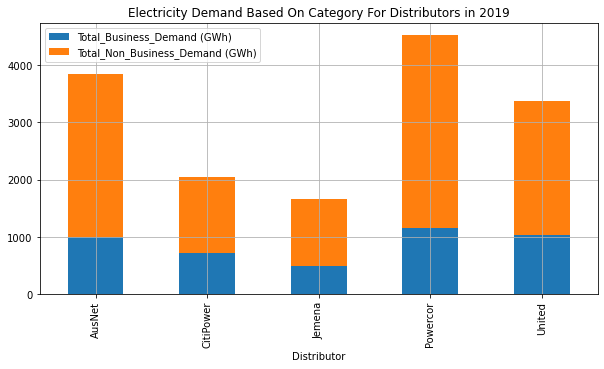

In [229]:

demandDBGroupCat2019DF.plot(kind='bar', stacked=True , figsize = [10,5], 
                     title = "Electricity Demand Based On Category For Distributors in 2019", grid = True)

In [230]:
annualDemand2015DF = demand_df.loc[((demand_df.Measure_Date >= '2014-07-01') & (demand_df.Measure_Date < '2015-07-01'))]
demandDBGroup2015DF = annualDemand2015DF.groupby(['Distributor']).agg({'Daily_Demand':'sum'}) 
demandDBGroup2015DF = pd.DataFrame(demandDBGroup2015DF['Daily_Demand']/1000000)
demandDBGroup2015DF = demandDBGroup2015DF.rename(columns={"Daily_Demand" : "Total_Demand 2015 (GWh)"})
demandDBGroup2015DF


,Total_Demand 2015 (GWh)
Distributor,
AusNet,2308.868677
CitiPower,2043.916803
Jemena,1599.003993
Powercor,4373.277561
United,3323.842901


In [231]:
demand2015_2019 = demandDBGroup2015DF.merge(demandDBGroup2019DF, left_index=True, right_index=True)
demand2015_2019 = demand2015_2019.reset_index()
demand2015_2019

,Distributor,Total_Demand 2015 (GWh),Total_Demand 2019 (GWh)
0,AusNet,2308.868677,3835.008990
1,CitiPower,2043.916803,2047.161158
2,Jemena,1599.003993,1658.313100
3,Powercor,4373.277561,4512.949229
4,United,3323.842901,3370.957059


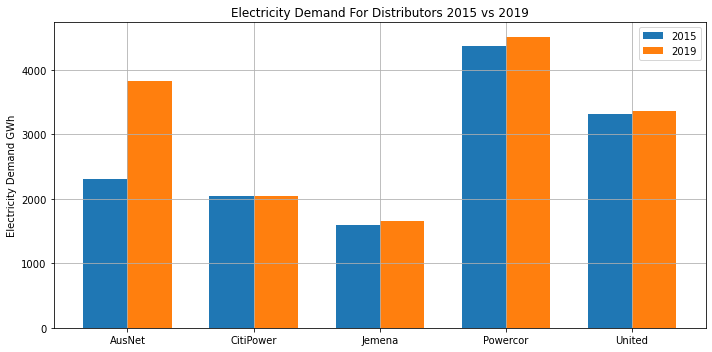

In [237]:

labels = demand2015_2019['Distributor'].to_list()
demand2015 = demand2015_2019['Total_Demand 2015 (GWh)'].to_list()
demand2019 =  demand2015_2019['Total_Demand 2019 (GWh)'].to_list()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = [10,5])
rects1 = ax.bar(x - width/2, demand2015, width, label='2015')
rects2 = ax.bar(x + width/2, demand2019, width, label='2019')

ax.set_ylabel('Electricity Demand GWh')
ax.set_title('Electricity Demand For Distributors 2015 vs 2019')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid()

fig.tight_layout()

plt.show()